# Import

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np

# Needed for PCA
from sklearn import decomposition

from matplotlib import pyplot as plt

# to restore the saved session
import example_autoencoder_1 as ae

import argparse

#import matplotlib.cm as cm

n_code = 2

# Scatter Plot

In [5]:
def scatter(x, y):
    
    # there are many different ways of setting colors
    # color-hex
    colors = [
        ('#c0392b', '*'),
        ('#ae6027', 's'),
        ('#8e44ad', 'o'),
        ('#f39c12', '^'),
        ('#c0392b', 'x'),
        ('#27ae60', '*'),
        ('#2980b9', 's'),
        ('#8e44ad', 'o'),
        ('#955aa4', '^'),
        ('#f39c12', 'x'),
    ]
    
    #colors = ['y', 'g', 'r', 'c', 'm', 'b', 'k', 'w']
    
    for num in range(10):
        
        plt.scatter([x[:,0][i] for i in range(len(y)) if y[i] == num],
        [x[:,1][i] for i in range(len(y)) if y[i] == num], 7,
        label=str(num), color = colors[num][0], marker=colors[num][1])
        
    plt.legend()
    plt.show()
    



MNIST Data
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


Performing PCA
PCA Codes
Re-Constructing


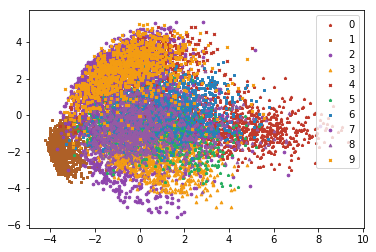

Starting Autoencoder C:/Users/Ali/logs/mnist_autoencoder_linear_2_logs/model-checkpoint-0200-110000


INFO:tensorflow:Restoring parameters from C:/Users/Ali/logs/mnist_autoencoder_linear_2_logs/model-checkpoint-0200-110000
Model restored from file: None
Running Autoencoder & Re-Constructing




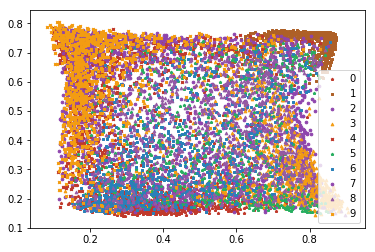

7


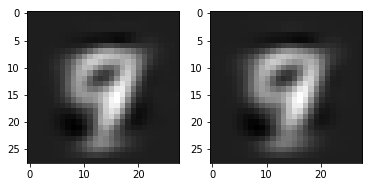

2


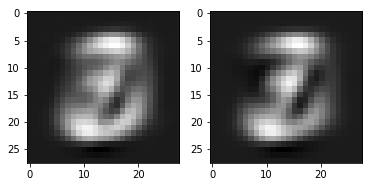

1


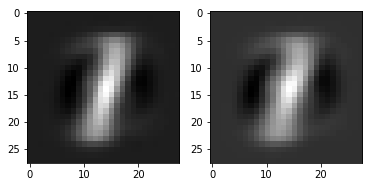

0


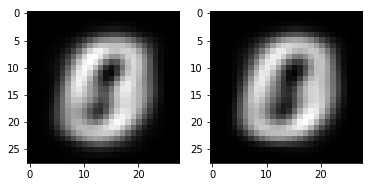

4


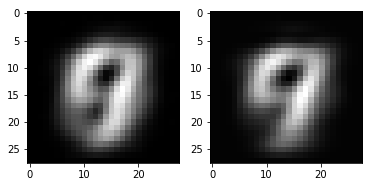

1


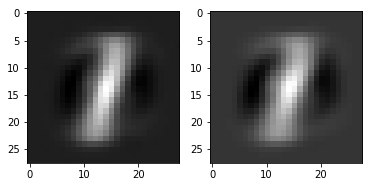

4


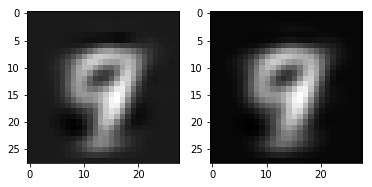

9


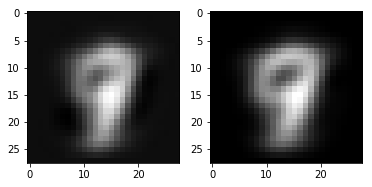

5


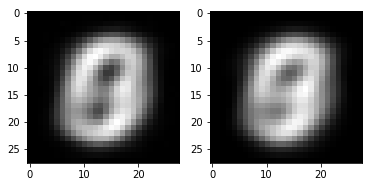

9


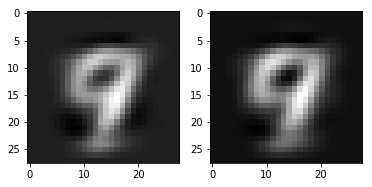

0


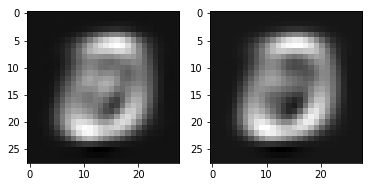

6


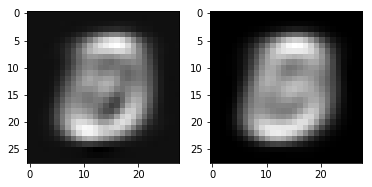

9


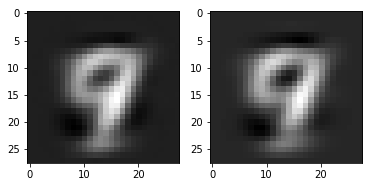

0


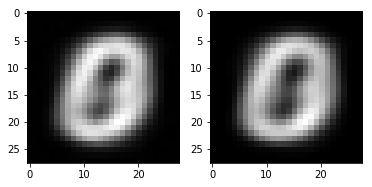

1


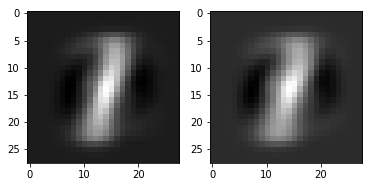

5


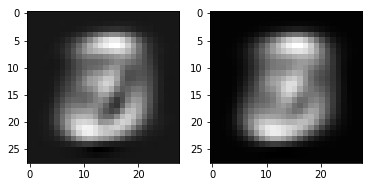

9


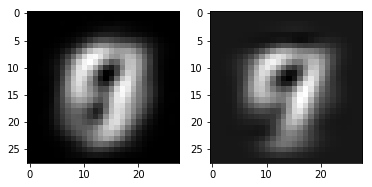

7


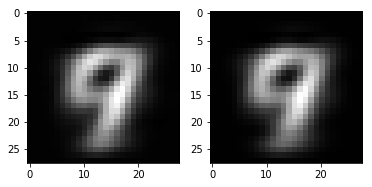

3


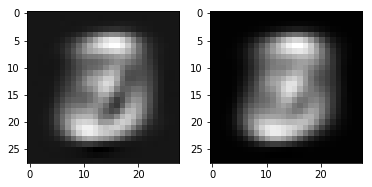

4


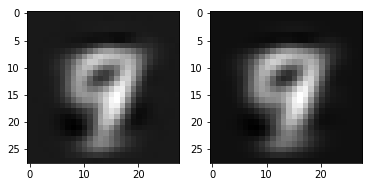

In [6]:


if __name__ == '__main__':

    #if a python file, please use the 4 lines bellow
    #parser = argparse.ArgumentParser(description='Autoencoder')
    #parser.add_argument('savepath', nargs=1, type=str)
    #args = parser.parse_args()
    
    #use it with notebook
    #you can change with your own     
    args_savepath = 'C:/Users/Ali/logs/mnist_autoencoder_linear_2_logs/model-checkpoint-0200-110000'
    
    print('\n')
    print('MNIST Data')
    mnist = input_data.read_data_sets("data/", one_hot=False)
    
    #print('\n')
    #print('Labels')
    #for i in range(10):
    #   print(mnist.test.labels[i])
    
    print('\n')
    
    #=====================================
    # PCA
    print ('Performing PCA')
    pca = decomposition.PCA(n_components=2)
    pca.fit(mnist.train.images)
    
    print('PCA Codes')
    pca_codes = pca.transform(mnist.test.images)
    #print(pca_codes)
    
    print('Re-Constructing')
    # transform data into its original space
    pca_reconstructed = pca.inverse_transform(pca_codes[:20])
    #print(pca_reconstructed)

    #-------------------------------------------------
    
    '''
    for i in range(10):
        plt.imshow(pca_reconstructed[i].reshape((28,28)), cmap=plt.cm.gray)
        plt.show()
    '''

    # Plotting
    scatter(pca_codes, mnist.test.labels)

    with tf.Graph().as_default():

        with tf.variable_scope("autoencoder_model"):

            x = tf.placeholder("float", [None, 784]) # MNIST data image of shape 28*28=784
            
            phase_train = tf.placeholder(tf.bool)

            code = ae.encoder(x, n_code, phase_train)

            output = ae.decoder(code, n_code, phase_train)

            cost, train_summary_op = ae.loss(output, x)

            global_step = tf.Variable(0, name='global_step', trainable=False)

            train_op = ae.training(cost, global_step)

            eval_op, in_imagine_op, out_imagine_op, val_summary_op = ae.evaluate(output, x)

            #saver = tf.train.Saver()
            #sess = tf.Session()

            print('Starting Autoencoder', args_savepath ) #args.savepath[0]
            print('\n')
            
            sess = tf.Session()
            saver = tf.train.Saver()
            save_path = saver.restore(sess, args_savepath ) #args.savepath[0]
            print("Model restored from file: %s" % save_path)

            print('Running Autoencoder & Re-Constructing')
            print('\n')

            ae_codes, ae_reconstruction = sess.run([code, output], feed_dict={x: mnist.test.images*np.random.randint(2, size=(784)), phase_train: True})

            scatter(ae_codes, mnist.test.labels)
            
            #plt.scatter(ae_codes, mnist.test.labels)
            
            
            for i in range(20):
                print(mnist.test.labels[i])
                plt.subplot(121)
                plt.imshow(ae_reconstruction[i].reshape((28,28)), cmap=plt.cm.gray)
                plt.subplot(122)
                plt.imshow(pca_reconstructed[i].reshape((28,28)), cmap=plt.cm.gray)
                plt.show()
            